In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# import file using pandas

city_data = os.path.join('raw_data', 'city_data.csv')
ride_data = os.path.join('raw_data', 'ride_data.csv')


In [3]:
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

In [4]:
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')
merged_df.head

<bound method NDFrame.head of                 city  driver_count   type                 date   fare  \
0         Kelseyland            63  Urban  2016-08-19 04:27:52   5.51   
1         Kelseyland            63  Urban  2016-04-17 06:59:50   5.54   
2         Kelseyland            63  Urban  2016-05-04 15:06:07  30.54   
3         Kelseyland            63  Urban  2016-01-25 20:44:56  12.08   
4         Kelseyland            63  Urban  2016-08-09 18:19:47  17.91   
5         Kelseyland            63  Urban  2016-10-24 15:15:46  33.56   
6         Kelseyland            63  Urban  2016-06-06 13:54:23  20.81   
7         Kelseyland            63  Urban  2016-08-10 07:02:40  44.53   
8         Kelseyland            63  Urban  2016-07-05 17:37:13  29.02   
9         Kelseyland            63  Urban  2016-04-25 02:18:31  20.05   
10        Kelseyland            63  Urban  2016-01-25 08:47:09   9.29   
11        Kelseyland            63  Urban  2016-11-10 01:57:14  20.58   
12        Kelseyland 

In [77]:
#merged_df = city_df.merge(ride_df, on = 'city')
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [78]:
#city 
city = merged_df.groupby('city')

# Avgerage 
avg_fare = city.mean()['fare']

ride_count = by_city['ride_id'].count()

# driver_count
driver_count = city.mean()['driver_count']

city_type = city_df.set_index('city')['type']

city_data = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)


,Average Fare,Number of Drivers,Number of Rides,Type of City
Davidtown,22.978095,73.0,21,Urban
South Bryanstad,24.598571,73.0,21,Urban
Williamshire,26.990323,70.0,31,Urban
West Sydneyhaven,22.368333,70.0,18,Urban
Torresshire,24.207308,70.0,26,Urban
Fosterside,23.034583,69.0,24,Urban
Spencertown,23.681154,68.0,26,Urban
Alyssaberg,20.609615,67.0,26,Urban
Smithhaven,22.788889,67.0,27,Urban
Lisaville,28.428929,66.0,28,Urban


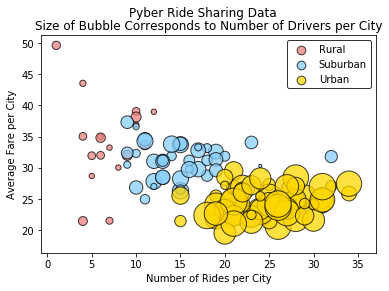

In [79]:
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

#city categories
rural = city_data[city_info['Type of City'] == 'Rural']
suburban = city_data[city_info['Type of City'] == 'Suburban']
urban = city_data[city_info['Type of City'] == 'Urban']

city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Data')

# scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

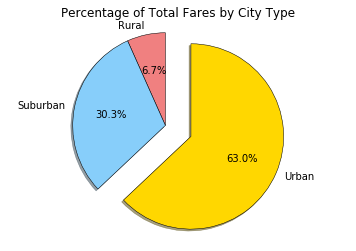

In [80]:
#pie charts
city_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_sum =  city_type.sum()['fare']

labels = fare_sum.index

colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('Percentage of Total Fares by City Type')
plt.axis('equal')
plt.show()

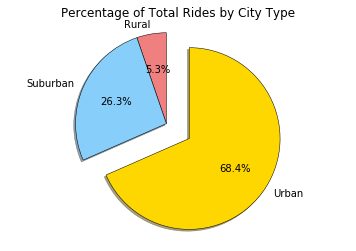

In [81]:
# number of ride per city type
ride_sum = city_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Rides by City Type')
plt.axis('equal')
plt.show()

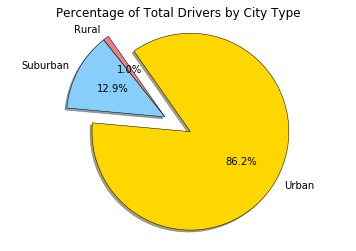

In [50]:
# of driver per city type
driver_sum = city_type.sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('Percentage of Total Drivers by City Type')
plt.axis('equal')
plt.show()